In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
# import fastf1
import fastf1.plotting
from fastf1.core import Laps


fastf1.Cache.enable_cache('cache')  # replace with your cache directory

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)
# fastf1.plotting.setup_mpl(mpl_timedelta_support=True)

session = fastf1.get_session(2023, 'Bahrain', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarn

In [16]:
# create a new PD with a list of drivers

drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'PER' 'LEC' 'SAI' 'ALO' 'RUS' 'HAM' 'STR' 'OCO' 'HUL' 'NOR' 'BOT'
 'ZHO' 'TSU' 'ALB' 'SAR' 'MAG' 'PIA' 'DEV' 'GAS']


In [17]:
# After that we’ll get each drivers fastest lap, create a new laps object from these laps, sort them by lap time and have pandas reindex them to number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [18]:
# The plot is nicer to look at and more easily understandable if we just plot the time differences. Therefore we subtract the fastest lap time from all other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [19]:
# We can take a quick look at the laps we have to check if everything looks all right. For this, we’ll just check the ‘Driver’, ‘LapTime’ and ‘LapTimeDelta’ columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:29.708000        0 days 00:00:00
1     PER 0 days 00:01:29.846000 0 days 00:00:00.138000
2     LEC        0 days 00:01:30 0 days 00:00:00.292000
3     SAI 0 days 00:01:30.154000 0 days 00:00:00.446000
4     ALO 0 days 00:01:30.336000 0 days 00:00:00.628000
5     RUS 0 days 00:01:30.340000 0 days 00:00:00.632000
6     HAM 0 days 00:01:30.384000 0 days 00:00:00.676000
7     STR 0 days 00:01:30.836000 0 days 00:00:01.128000
8     OCO 0 days 00:01:30.984000 0 days 00:00:01.276000
9     HUL 0 days 00:01:31.055000 0 days 00:00:01.347000
10    NOR 0 days 00:01:31.381000 0 days 00:00:01.673000
11    BOT 0 days 00:01:31.443000 0 days 00:00:01.735000
12    ALB 0 days 00:01:31.461000 0 days 00:00:01.753000
13    ZHO 0 days 00:01:31.473000 0 days 00:00:01.765000
14    SAR 0 days 00:01:31.652000 0 days 00:00:01.944000
15    MAG 0 days 00:01:31.892000 0 days 00:00:02.184000
16    PIA 0 days 00:01:32.101000 0 days 00:00:02

In [20]:
# Finally, we’ll create a list of team colors per lap to color our plot.

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

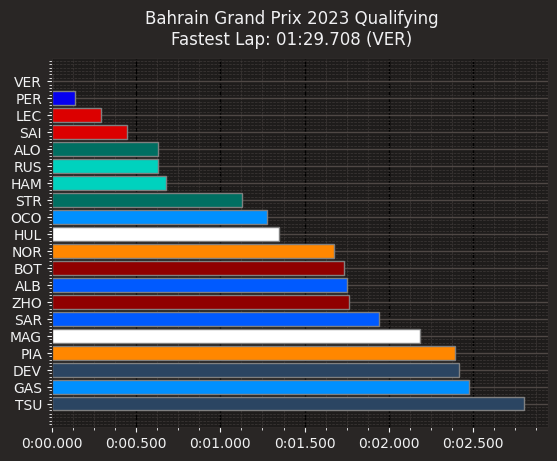

In [26]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plot_filename = f"{session.event['EventName']} {session.event.year} Qualifying.png"
plt.savefig(plot_filename, dpi=1200)
plt.show()
